# Ejemplo práctico: presupuesto de comunas

En este ejemplo vamos a analizar el presupuesto de las comunas por región. Para esto, vamos a trabajar con los `.csv` de Comunas y Presupuesto por Comunas. Primero vamos a importar nuestros DataFrames y vamos a hacer el _merge_ respectivo.

In [1]:
import pandas as pd

df_comunas = pd.read_csv("codigos.csv", delimiter=";")
df_presupuesto = pd.read_csv("presupuesto_2019.csv", delimiter=";")

In [2]:
# Limpiamos el DataFrame de presupuesto
df_presupuesto = df_presupuesto.replace("No Recepcionado", 0)
df_presupuesto["PRESUPUESTO"] = df_presupuesto["PRESUPUESTO"].astype(int)

In [3]:
# Hacemos el merge

df_merge = df_comunas.merge(df_presupuesto, left_on="Código Comuna 2018", right_on="CODIGO")

# Y dejamos las columnas que necesitmaos
df_merge = df_merge[["Nombre Comuna", "Nombre Región", "PRESUPUESTO"]]
df_merge

,Nombre Comuna,Nombre Región,PRESUPUESTO
0,Iquique,Tarapacá,59072234
1,Alto Hospicio,Tarapacá,13984411
2,Pozo Almonte,Tarapacá,7613962
3,Camiña,Tarapacá,1584008
4,Colchane,Tarapacá,2500000
...,...,...,...
340,San Carlos,Ñuble,10459691
341,Coihueco,Ñuble,5001190
342,Ñiquén,Ñuble,3386698
343,San Fabián,Ñuble,1798500


Ahora, ¿qué pasa cuando hacemos `describe`?

In [4]:
df_merge.describe()

,PRESUPUESTO
count,3.450000e+02
mean,1.413407e+07
std,2.740327e+07
min,0.000000e+00
25%,3.188141e+06
50%,5.372994e+06
75%,1.225000e+07
max,3.399804e+08


¿Qué podemos deducir de los datos anteriores? Ahora veamos estos datos solo para la región metropolitana.

In [5]:
df_metropolitana = df_merge[df_merge["Nombre Región"] == "Metropolitana de Santiago"]
# El apply nos cambia la notación del .describe()
df_metropolitana.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,PRESUPUESTO
count,52.00
mean,43416556.31
std,54609666.38
min,3145694.00
25%,14334394.75
50%,30083565.50
75%,47437241.25
max,339980450.00


Veamos cuál es la comuna de la Región Metropolitana con más presupuesto.

In [6]:
df_metropolitana.sort_values("PRESUPUESTO", ascending=False).head(5)

,Nombre Comuna,Nombre Región,PRESUPUESTO
269,Las Condes,Metropolitana de Santiago,339980450
256,Santiago,Metropolitana de Santiago,163383547
278,Providencia,Metropolitana de Santiago,125041538
274,Maipú,Metropolitana de Santiago,119318265
287,Vitacura,Metropolitana de Santiago,97000000


Como vemos, es la comuna de Las Condes. Veamos que pasa cuando sacamos esta comuna del DataFrame.

In [7]:
df_metropolitana_sin_lc = df_metropolitana[df_metropolitana["Nombre Comuna"] != "Las Condes"]

In [8]:
df_metropolitana_sin_lc.sort_values("PRESUPUESTO", ascending=False).head(5)

,Nombre Comuna,Nombre Región,PRESUPUESTO
256,Santiago,Metropolitana de Santiago,163383547
278,Providencia,Metropolitana de Santiago,125041538
274,Maipú,Metropolitana de Santiago,119318265
287,Vitacura,Metropolitana de Santiago,97000000
265,La Florida,Metropolitana de Santiago,95609849


In [9]:
df_metropolitana_sin_lc.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,PRESUPUESTO
count,51.00
mean,37601578.00
std,35332235.46
min,3145694.00
25%,14032736.50
50%,29790072.00
75%,41816220.00
max,163383547.00


Como vemos, el promedio cambió bastante. Vamos a calcular el cambio en cada una de las medidas.

In [10]:
diff_dataframes = df_metropolitana.describe() - df_metropolitana_sin_lc.describe()
diff_dataframes.apply(lambda s: s.apply('{0:.2f}'.format))

,PRESUPUESTO
count,1.00
mean,5814978.31
std,19277430.92
min,0.00
25%,301658.25
50%,293493.50
75%,5621021.25
max,176596903.00


Para comprender de mejor forma los datos, podemos dividir en distintos _bins_ el presupuesto, para así hacer un histograma.

<AxesSubplot:>

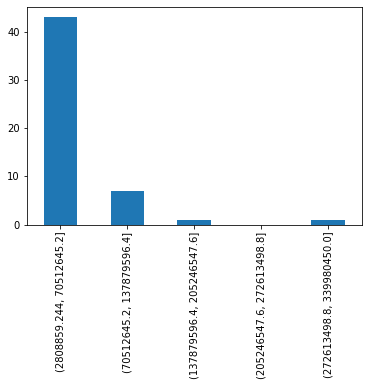

In [11]:
# Ojo, hacemos copy porque df_metropolitana representa un slice de un DataFrame más grande
# Y a pandas no le gusta crear columnas a un DataFrame que es un slice de un DataFrame
# Por lo que es mejor copiar el contenido a un nuevo
df_metro = df_metropolitana.copy()
df_metro["intervalos_presupuesto"] = pd.cut(df_metro["PRESUPUESTO"], 5)
df_metro["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Como vemos, la mayor parte de las comunas tiene un presupuesto que cae en el primer bin. Probemos con más bins.

<AxesSubplot:>

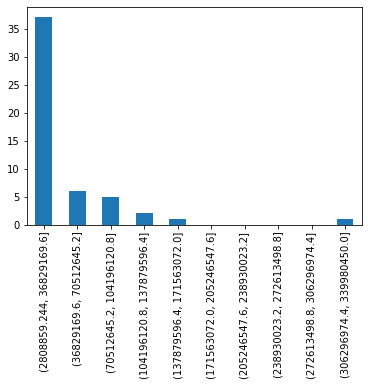

In [12]:
df_metro["intervalos_presupuesto"] = pd.cut(df_metro["PRESUPUESTO"], 10)
df_metro["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

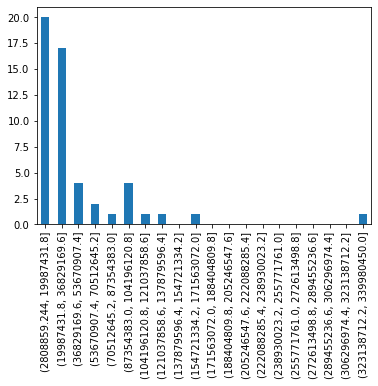

In [13]:
df_metro["intervalos_presupuesto"] = pd.cut(df_metro["PRESUPUESTO"], 20)
df_metro["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Como vemos, la mayor parte de las comunas tiene un presupuesto bajo. Ahora, ¿qué pasa si calculamos el _skew_ de la columna presupuesto?

In [14]:
df_metropolitana.skew()

PRESUPUESTO    3.579377
dtype: float64

También podemos probar cómo queda el histograma para las comunas de la Región Metropolitana sin la comuna de Las Condes.

<AxesSubplot:>

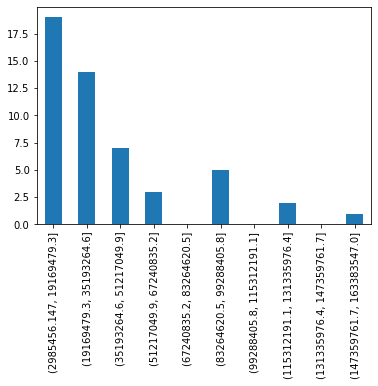

In [15]:
df_metro_slc = df_metropolitana_sin_lc.copy()
df_metro_slc["intervalos_presupuesto"] = pd.cut(df_metro_slc["PRESUPUESTO"], 10)
df_metro_slc["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

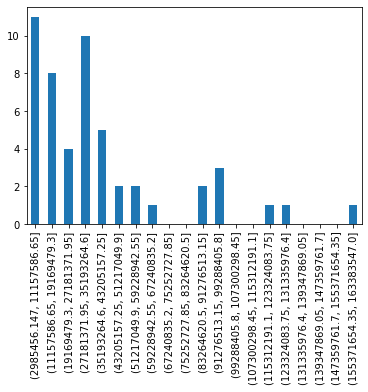

In [16]:
df_metro_slc["intervalos_presupuesto"] = pd.cut(df_metro_slc["PRESUPUESTO"], 20)
df_metro_slc["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')

Finalmente podemos probar esto para otra región. Veamos que pasa con la región de Aysen.

In [18]:
df_aysen = df_merge[df_merge["Nombre Región"] == "Aysén del General Carlos Ibáñez del Campo"]

<AxesSubplot:>

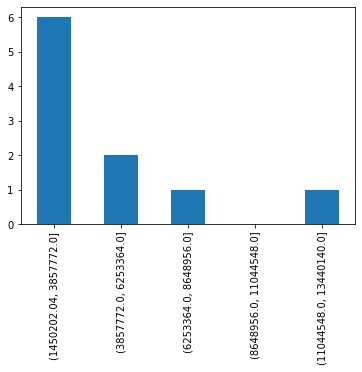

In [19]:
df_aysen_copy = df_aysen.copy()
df_aysen_copy["intervalos_presupuesto"] = pd.cut(df_aysen_copy["PRESUPUESTO"], 5)
df_aysen_copy["intervalos_presupuesto"].value_counts(sort=False).plot(kind='bar')